# Choosing the right title for your resume
### The keywords for data science and analogous roles

- [Useful prior information](#info)
- [Importing libraries](#imports)
- [Revising the data](#data)
- [Data Wrangling](#wrangling)
- [Analysis](#analysis)
    - [TF-IDF top words](#tfidf)
    - [Multiclass Classification with MultinomialNB](#multi)
- [Predicting on New Data](#predict)
- [Saving the Data](#saving)
- [Next Steps](#steps)

<a id=info></a>

<div class="alert alert-info">
    <H2>Useful Prior Information:</H2>
<ul>
    <li>This analysis is done for personal use (not commercial). I am looking for a job as a data scientist and I wanted some insights into what keywords I should use and how to present myself in the job market.</li>
    <li>The data used here is scraped from Indeed.com but it is not used with any comercial purpose.</li>
    <li>The date that the data was extracted was from 20th to the 23rd of October</li>
    <li>I hope that the insights gathered here are useful for other people as well.</li>
</ul>
</div>

<a id=imports></a>

## Imports

In [1]:
#data wrangling libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#text manipulation libraries
from sklearn.feature_extraction import text #will allow us to specify stop words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#machine learning libraries
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import MultinomialNB

#model evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<a id=data></a>

## Revising the Data

The last 10 days of October 2020 I scrapped job descriptions using 6 different combinations of keywords I was interested in these are the keywords I used:

- Data Analyst `da`
- Business Analyst `ba`
- Business Intelligence `bi`
- Data Scientist `ds`
- Machine Learning `ml`
- Software Engineer `se`


In [2]:
#we upload the dataframes (which are in the data folder)
da = pd.read_csv('data/20_10_2020_data analyst_California.csv')
ba = pd.read_csv('data/21_10_2020_business analyst_California.csv')
bi = pd.read_csv('data/22_10_2020_business intelligence_California.csv')
ds = pd.read_csv('data/22_10_2020_data scientist_California.csv')
ml = pd.read_csv('data/23_10_2020_machine learning_California.csv')
se = pd.read_csv('data/23_10_2020_software engineer_California.csv')

In [3]:
#we put the in a list
dfs = [da,ba,bi,ds,ml, se]

In [4]:
#let's check the lengths in cols and rows of our dataframes
[df.shape for df in dfs]

[(960, 10), (255, 10), (360, 10), (944, 10), (802, 10), (105, 10)]

In [5]:
#as we can see they all have 10 columns let's see what information we scraped
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        960 non-null    object
 1   company      960 non-null    object
 2   link         960 non-null    object
 3   date_listed  960 non-null    object
 4   location     960 non-null    object
 5   salary       960 non-null    object
 6   remote       960 non-null    object
 7   rating       960 non-null    object
 8   easy_apply   960 non-null    object
 9   description  960 non-null    object
dtypes: object(10)
memory usage: 75.1+ KB


In [6]:
#now let's check the head to get a better idea
da.head()

,title,company,link,date_listed,location,salary,remote,rating,easy_apply,description
0,Senior Data Analyst (Healthcare and HEDIS expe...,Advantmed,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1 day ago,"Santa Ana, CA","$90,000 - $100,000 a year",Remote,3.3,Easily apply,Job Description\nThe Senior Data Analyst will ...
1,Data Analyst (Work from home),Ajilon,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1 day ago,"San Francisco, CA 94104 (Financial District area)",$22 an hour,Remote,3.8,None,Position Summary:\nAssists Litigation Analyst ...
2,Data Analyst - Payements,Ursus,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,12 days ago,"Menlo Park, CA",None,None,None,Easily apply,Job Title: Data Analyst - Payments\nLocation: ...
3,Junior Data Analyst,Helm360,https://www.indeed.com/company/Helm360/jobs/Ju...,25 days ago,"San Diego, CA","$80,000 - $90,000 a year",None,None,Easily apply,"· Managing master data, including creation, up..."
4,Data Analyst,Ursus,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,3 days ago,"San Jose, CA 95110 (Downtown area)",None,None,None,Easily apply,ABOUT THE COMPANY:\nOur client is the number o...


Several things can be done:
- The None are note specified, we can assign them `nan` values
- For our goal, we just need two columns (title and description), we can drop the other ones and leave them for a future analysis
- The descriptions have \n to specify new lines, we can replace them with spaces
- The titles seem to include words that are not useful for our analysis we might be able to separate them to keep the keywords only

<a id=wrangling></a>

## Data Wrangling

Let's start merging the dataframes so we can work with only one. We will assign a new column called `origin`to know from which original dataframe it came from.


In [7]:
da['origin'] = 'data science'
ba['origin'] = 'business analyst'
bi['origin'] = 'business intelligence' 
ds['origin'] = 'data scientist'
ml['origin'] = 'machine learning'
se['origin'] = 'software engineer'

In [8]:
#we concatenate them
df = pd.concat(dfs, axis=0, ignore_index=True)

In [9]:
#replace None for NaN values 
df.replace('None', np.nan, inplace=True)

In [10]:
#we drop the columns we will not need
df.drop(df.columns.difference(['title','description','origin','title_clean']), axis=1, inplace=True)

In [11]:
#take out the \n from the descriptions
df['description'] = [x.replace('\n', ' ') for x in df.description]

In [12]:
#we check how many unique titles we have
len(df.title.unique())

1860

In [13]:
#we see that some of these titles are long because they provide more information than we need
df.title.unique()

array(['Senior Data Analyst (Healthcare and HEDIS experience)',
       'Data Analyst (Work from home)', 'Data Analyst - Payements', ...,
       'MTS 2, Software Engineer (Front End)',
       'Software Engineer, Front End - Customer Experience',
       "Back End Software Developer Co'op: 2021"], dtype=object)

In [14]:
from collections import Counter, OrderedDict
top_words = df['title'].str.cat(sep=', ').split() #this separates our words individually and adds a comma between them
top_words = Counter(top_words)                    #this counts which words appear the most and returns a dictionary
top_words = OrderedDict({k: v for k, v in         #this returns the dictionary ordered from most common word to least common
                         sorted(top_words.items(), key=lambda item: item[1], reverse=True)})

words = []                                        #this will generate a list with only the words that appear more than 30 times
for key, value in top_words.items():
    if value > 30:
        words.append(key)

In [15]:
#we now remove some words and punctuation that are not relevant for us, we lowercase everything
remove = ['-','Sr.','and','&','(Remote),','/','Senior','Sr.','Intelligence,','of','Lead','II,','–','Sr']
remove = [x for x in words if x not in remove]
remove = [x.replace('[^\w\s]','').lower() for x in remove]

#some words that did not make the cut but are need to avoid have many empty values are:
remove.extend(['developer','database','consultant','statistician'])
keep_these_words = [x for x in remove if x not in ['mts','full','end,','intern']]

In [16]:
keep_these_words

['data',
 'analyst,',
 'business',
 'engineer,',
 'software',
 'scientist,',
 'machine',
 'learning',
 'analyst',
 'engineer',
 'scientist',
 'intelligence',
 'learning,',
 'manager,',
 'analytics,',
 'analytics',
 'systems',
 'deep',
 'research',
 'staff',
 'principal',
 'applied',
 'science',
 'product',
 'it',
 'operations',
 'developer,',
 'sales',
 'computer',
 'bi',
 'manager',
 'intern,',
 'architect,',
 'back',
 'quality',
 'science,',
 'ai',
 'developer',
 'database',
 'consultant',
 'statistician']

In [17]:
#we are ready to clean our title column, we create a new column with the clean text, we create a string that helps us match the keywords above
df['title_clean'] = df['title'].str.replace('[^\w\s]',' ').str.lower()
pat = r'\b(?:{})\b'.format('|'.join(keep_these_words))
df['title_clean'] = df['title_clean'].str.findall('(' + pat + ')').str.join(' ')
df['title_clean'] = df['title_clean'].replace('','None') #this adds "None" if a title lost all its words

In [18]:
len(df[df['title_clean'] == 'None'])

25

In [19]:
#Let's check value_counts duplicates without taking into account 
mask = df.duplicated(subset=df.columns.difference(['origin'])) # we could separate these
len(df[mask])

828

In [20]:
#we will erase them
df = df[~mask]

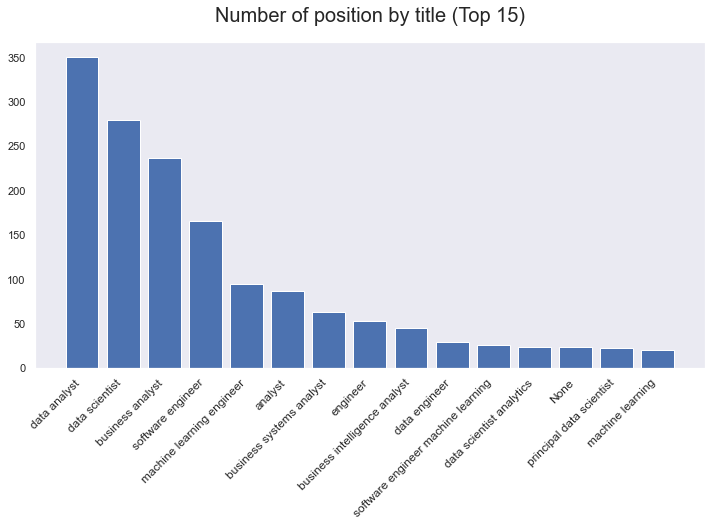

In [21]:
df_countplot = df['title_clean'].value_counts().head(15)

plt.figure(figsize=(12,6))
plt.bar(x=df_countplot.index.to_list(),height=df_countplot.values, data=df_countplot)
plt.title('Number of position by title (Top 15)', pad=20, size=20)
plt.xticks(rotation=45,ha ='right', fontsize=12)
plt.grid(False)
plt.show()

In [22]:
#we can make some assumptions and put some of the trailing titles together with some of the first ones
df['title_clean'] = df['title_clean'].map({
                       'software engineer machine learning':'machine learning engineer',
                       'machine learning':'machine learning engineer',
                       'data scientist analytics':'data scientist',
                       'principal data scientist':'data scientist',
                       'business data analyst':'data analyst',                       
                    }).fillna(df['title_clean'])

# I was not sure about putting:
#   - 'business systems analyst' into 'business analyst' but it seems more of a technical role so I left it out
#   - 'business intelligence analyst' into 'business analyst' but I felt it is in between business and data analyst

In [23]:
#let's clean the descriptions by removing hyperlinks
df['description_clean'] = df['description'].str.replace('http\S+|www.\S+', '', case=False)

# Removing unwanted characters
df['description_clean'] = df['description_clean'].str.replace('[^a-zA-Z]', ' ') #add "0-9" before "a-z" if you want to keep numbers

# Making everything lowercase
df['description_clean'] = df['description_clean'].str.lower()

<a id=analysis></a>

## Analysis

We are going to try and make a multiclass text classification of the top 5 titles

In [24]:
df = df[df['title_clean'].isin(['data analyst','data scientist','business analyst','software engineer','machine learning engineer'])]

In [25]:
df.groupby('title_clean').count()

,title,description,origin,description_clean
title_clean,,,,
business analyst,236,236,236,236
data analyst,369,369,369,369
data scientist,325,325,325,325
machine learning engineer,141,141,141,141
software engineer,166,166,166,166


In [26]:
#we assign a value to each title so machines can understand them, I order them from least technical to most technical from my point of view
df['label'] = df['title_clean'].map({'business analyst':1,'data analyst':2, 'data scientist':3,'machine learning engineer':4, 'software engineer':5})

In [27]:
#another option is to use category_encoders library
#import category_encoders as ce   # version 1.2.8
#ce_ord = ce.OrdinalEncoder(cols = ['title_clean'])
#ce_ord.fit_transform(df['title_clean']) 

<a id=tfidf></a>

### TF-IDF top words
TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. (wikipedia)

In [28]:
#We are adding the English stop words and other words that add noise to our analysis
additional_stop_words = ['description','business','data','analyst','scientist','scientists','science','machine','learning','software','engineer','ml','company','job'] #some words that appear a lot but do not add value
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

From [Susan Li's article](https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f) on `Towards Data Science`

- `sublinear_df` is set to `True` to use a logarithmic form for frequency.
- `min_df` is the minimum numbers (or percentage) of documents a word must be present in to be kept.
- `norm` is set to `l2`, to ensure all our feature vectors have a euclidian norm of 1.
- `ngram_range` is set to `(1, 2)` to indicate that we want to consider both unigrams and bigrams.
- `stop_words` is set to the stops words of the previous lines to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [29]:
#this calculates the TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.05, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=stop_words)
features = tfidf.fit_transform(df.description_clean).toarray()
labels = df.label
features.shape

(1237, 1167)

In [30]:
label_id = dict(zip(df.title_clean, df.label))

In [31]:
from sklearn.feature_selection import chi2

grams = {}

N = 10
for title, label in sorted(label_id.items()):
    features_chi2 = chi2(features, labels == label)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    grams[title] = unigrams[-N:][::-1] + bigrams[-N:][::-1]

pd.DataFrame(grams)

,business analyst,data analyst,data scientist,machine learning engineer,software engineer
0,project,reports,predictive,tensorflow,backend
1,specifications,reporting,statistics,pytorch,stack
2,document,excel,models,art,distributed
3,assist,tableau,statistical,deep,javascript
4,documents,microsoft,phd,frameworks,architecture
5,processes,algorithms,regression,object,java
6,planning,dashboards,experiments,deploy,scalability
7,administration,ai,modeling,algorithms,code
8,accounting,tensorflow,mining,detection,web
9,management,bi,physics,models,nosql


<id a=multi></a>

### Multiclass Classification with MultinomialNB

Here is the documentation for Sklearn's [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [32]:
#This will basically apply the vectorizer and separate the X and y
def make_xy(dataframe, text_column, target, vectorizer=None):    
    """Applies countvectorizer to our data and separates it between our predictors and our target variable"""
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=0.05,max_df=0.9, stop_words=stop_words)
    X = vectorizer.fit_transform(dataframe[text_column])
    X = X.tocsc() 
    y = dataframe[target]
    return X, y

#this will do the train test split, calculate the MultinomialNB, and return the results with some metrics.
def MNB(chosen_alpha, chosen_min_df, chosen_max_df):
    """In this function you pass the alpha and min_df of your choice and it will calculate the MultinomialNB"""
    vectorizer = CountVectorizer(min_df=chosen_min_df, max_df=chosen_max_df, stop_words=stop_words, ngram_range=(1,2))
    X, y = make_xy(df, 'description_clean', target_column, vectorizer)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = MultinomialNB(alpha=chosen_alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('Classification Report')
    print(classification_report(y_test, y_pred))
    print('-'*20)
    print('Confussion Matrix')
    print(confusion_matrix(y_test,y_pred))
    print('-'*20)
    print('Accuracy Score (y_train, predict(X_train) & y_test, y_pred)')
    print(accuracy_score(y_train,clf.predict(X_train)))
    print(accuracy_score(y_test,y_pred))
    
    return clf, vectorizer, X_test

In [33]:
target_column = 'title_clean'

In [34]:
clf, vectorizer, X_test = MNB(chosen_alpha=0.5, chosen_min_df=0.05, chosen_max_df=0.9)

Classification Report
                           precision    recall  f1-score   support

         business analyst       0.70      0.64      0.67        72
             data analyst       0.72      0.66      0.68       116
           data scientist       0.66      0.81      0.73        86
machine learning engineer       0.65      0.68      0.67        50
        software engineer       0.83      0.73      0.78        48

                 accuracy                           0.70       372
                macro avg       0.71      0.70      0.70       372
             weighted avg       0.71      0.70      0.70       372

--------------------
Confussion Matrix
[[46 22  4  0  0]
 [19 76 20  0  1]
 [ 0  7 70  8  1]
 [ 0  0 11 34  5]
 [ 1  1  1 10 35]]
--------------------
Accuracy Score (y_train, predict(X_train) & y_test, y_pred)
0.7907514450867053
0.7016129032258065


In [35]:
x = np.eye(X_test.shape[1])

probabilities = pd.DataFrame(clf.predict_proba(x), 
                             index=np.array(vectorizer.get_feature_names()),
                             columns=clf.classes_)

In [36]:
top_values = {}
for col in probabilities.columns:
    top_values[col] = probabilities[col].sort_values(ascending=False).head(20).index

In [37]:
pd.DataFrame(top_values)

,business analyst,data analyst,data scientist,machine learning engineer,software engineer
0,specifications,reports,regression,pytorch,backend
1,gather,interpret,physics,state art,distributed systems
2,administration,bi,phd,tensorflow,javascript
3,workflow,tables,experiments,art,scalability
4,accounting,reporting,predictive,deploy,stack
5,document,microsoft,quantitative field,deep,java
6,consulting,duties assigned,mining,libraries,nosql
7,project,collection,spark,python experience,architecture
8,meetings,clinical,degree quantitative,artificial intelligence,distributed
9,objectives,report,identity gender,novel,linux


In [38]:
#we can check certain words how good predictors are of each class: try python, sql, excel, etc.
check_word = 'python'
probabilities.loc[check_word]

business analyst             0.027353
data analyst                 0.191539
data scientist               0.430080
machine learning engineer    0.205430
software engineer            0.145598
Name: python, dtype: float64

<a id=predict></a>

## Predicting on new data

In [39]:
test = ["""_____ and _____ with 7+ years of experience. Excellent working knowledge of Python, Tableau, PostgreSQL, MongoDB, and statistics to wrangle complex datasets and to provide actionable business insights. 
        PMP certified project manager with an extensive entrepreneurial background as former co-founder & CFO of a startup."""]
test = [x.lower() for x in test]

In [40]:
print(clf.predict(vectorizer.transform(test)))

['data scientist']


<a id=saving></a>

## Saving the Data

In [41]:
probabilities.to_csv('data/probabilities.csv', index=True)

In [42]:
import pickle
filename = 'model/Multinomial_NB.sav'
pickle.dump(clf, open(filename, 'wb'))

filename = 'model/Vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

<a id=steps></a>

## Next Steps

Here are a set of different things to do with this dataset in the future:
- Use other [multiclass classifiers](https://scikit-learn.org/stable/modules/multiclass.html) to predict our labels (e.g. LogisticRegression, LinearSVC, ExtraTreeClassifier)
- Do GridSearch or RandomSearch to find the best parameters
- Analyze the other features in the dataset